In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from textblob import Word, TextBlob
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from nltk.sentiment import SentimentIntensityAnalyzer
from warnings import filterwarnings

In [3]:
filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.width', 200)

## TEXT PRE-PROCESSING
### Görev 1: Metin ön işleme işlemleri.
        # 1. amazon.xlsx datasını okutunuz.
        # 2. "Review" değişkeni üzerinde
            # a. Tüm harfleri küçük harfe çeviriniz
            # b. Noktalama işaretlerini çıkarınız
            # c. Yorumlarda bulunan sayısal ifadeleri çıkarınız
            # d. Bilgi içermeyen kelimeleri (stopwords) veriden çıkarınız
            # e. 1000'den az geçen kelimeleri veriden çıkarınız
            # f. Lemmatization işlemini uygulayınız

In [2]:
# Görev 1 Amazon datasını okuma
file_path = "../datasets/KOZMOS-CaseStudy/amazon-221126-161000/amazon.xlsx"
df = pd.read_excel(file_path)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5611 entries, 0 to 5610
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Star     5611 non-null   int64 
 1   HelpFul  5611 non-null   int64 
 2   Title    5559 non-null   object
 3   Review   5593 non-null   object
dtypes: int64(2), object(2)
memory usage: 175.5+ KB


In [4]:
df.head()

,Star,HelpFul,Title,Review
0,5,0,looks great,Happy with it
1,5,0,Pattern did not align between the two panels.,Good quality material however the panels are m...
2,5,0,Imagery is stretched. Still fun.,Product was fun for bedroom windows.<br />Imag...
3,5,0,Que se ven elegantes muy finas,Lo unico que me gustaria es que sean un poco ...
4,5,0,Wow great purchase,Great bang for the buck I can't believe the qu...


In [5]:
# Görev 2
###############################
# Normalizing Case Folding
###############################
df["Review"] = df["Review"].str.lower()

In [8]:
# Punctuations
df["Review"] = df["Review"].str.replace('[^\w\s]', '', regex=True)

In [10]:
# Numbers
df["Review"] = df["Review"].str.replace('\d', '', regex=True)

In [13]:
# Stopwords
sw = stopwords.words('english')
df["Review"] = df["Review"].apply(lambda x: " ".join(i for i in str(x).split() if i not in sw))

In [19]:
# Rarewords / Custom Words
sil = pd.Series(" ".join(df["Review"]).split()).value_counts()[-1000:]
df["Review"] = df["Review"].apply(lambda x: " ".join(i for i in str(x).split() if i not in sil))

In [22]:
# Lemmatization
" ".join(Word(word).lemmatize() for word in "good quality material however panels mismatched".split())

'good quality material however panel mismatched'

In [23]:
df["Review"] = df["Review"].apply(lambda x: " ".join(Word(word).lemmatize() for word in x.split()))


# # Görev 2: Metin Görselleştirme

# Adım 1: Barplot görselleştirme işlemi
        # a. "Review" değişkeninin içerdiği kelimeleri frekanslarını hesaplayınız, tf olarak kaydediniz
        # b. tf dataframe'inin sütunlarını yeniden adlandırınız: "words", "tf" şeklinde
        # c. "tf" değişkeninin değeri 500'den çok olanlara göre filtreleme işlemi yaparak barplot ile görselleştirme işlemini tamamlayınız.


In [33]:
tf = df["Review"].apply(lambda x: pd.Series(x.split()).value_counts()).sum(axis=0).reset_index()

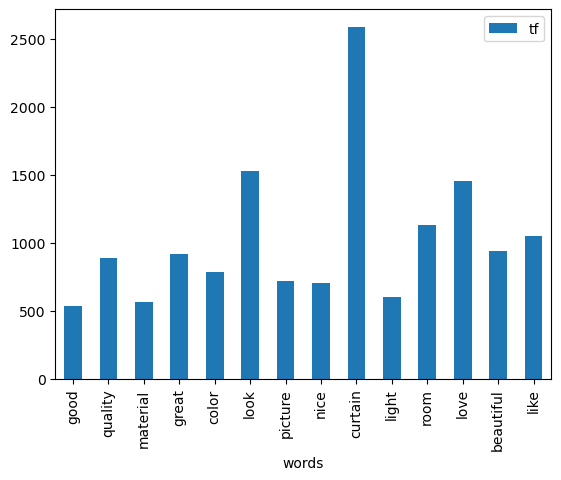

In [37]:
tf.columns = ["words", "tf"]
tf[tf["tf"] > 500].plot.bar(x="words", y="tf")
plt.show()